In [7]:
import requests
from bs4 import BeautifulSoup

# URL của trang web
url = 'https://cafef.vn/du-lieu/du-lieu-download.chn'

# Gửi yêu cầu HTTP đến trang web và lấy nội dung
response = requests.get(url)

# Phân tích cú pháp HTML của trang web
soup = BeautifulSoup(response.text, 'html.parser')

# Tìm tất cả các thẻ <a> có chứa href và lọc link chứa file .zip

for link in soup.find_all('a', href=True):
    href = link['href']
    # Kiểm tra nếu link chứa ".zip"
    if '.zip' in href:
        full_url = 'https://cafef.vn' + href  # Thêm domain nếu cần
        print(f"Đường dẫn tệp zip: {full_url}")



Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.CCNN.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.CCNN.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Raw.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Raw.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.Index.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.Index.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/C

In [15]:
import requests


# URL của tệp tin zip bạn muốn tải
url = "https://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Upto17012025.zip"
# Gửi yêu cầu tải tệp tin
response = requests.get(url)

# Lưu tệp tin zip vào thư mục hiện tại
file_name = "CafeF_SolieuGD_Upto17012025.zip"
with open(file_name, 'wb') as f:
    f.write(response.content)

print(f"Tệp tin {file_name} đã được tải về thành công.")


Tệp tin CafeF_SolieuGD_Upto17012025.zip đã được tải về thành công.


In [16]:
import zipfile
import os

# Đường dẫn tới tệp zip vừa tải
zip_file_path = "CafeF_SolieuGD_Upto17012025.zip"

# Giải nén tệp zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Giải nén vào thư mục hiện tại
    zip_ref.extractall(os.getcwd())

print(f"Đã giải nén tệp tin {zip_file_path}.")


Đã giải nén tệp tin CafeF_SolieuGD_Upto17012025.zip.


  <Ticker>  <DTYYYYMMDD>  <Open>  <High>  <Low>  <Close>  <Volume>
0      AAV      20250117     7.1     7.3    7.0      7.2    407117
1      AME      20250117     4.3     4.8    4.3      4.8       300
2      AMV      20250117     1.4     1.5    1.4      1.5    269265
3      API      20250117     7.5     7.5    7.3      7.3    171601
4      APS      20250117     6.2     6.2    6.1      6.2     59409
5      ATS      20250117    14.0    14.0   14.0     14.0       100
6      BAB      20250117    11.8    12.0   11.8     11.8      2502
7      BAX      20250117    41.2    41.2   41.2     41.2        20
8      BCC      20250117     7.3     7.3    7.0      7.2    131820
9      BCF      20250117    40.0    40.0   40.0     40.0        40
       <Ticker>  <DTYYYYMMDD>   <Open>   <High>    <Low>  <Close>  <Volume>
0           AAV      20250117   7.1000   7.3000   7.0000   7.2000    407117
218         AAV      20250116   7.2000   7.3000   7.0000   7.2000    171195
424         AAV      20250115   7.1

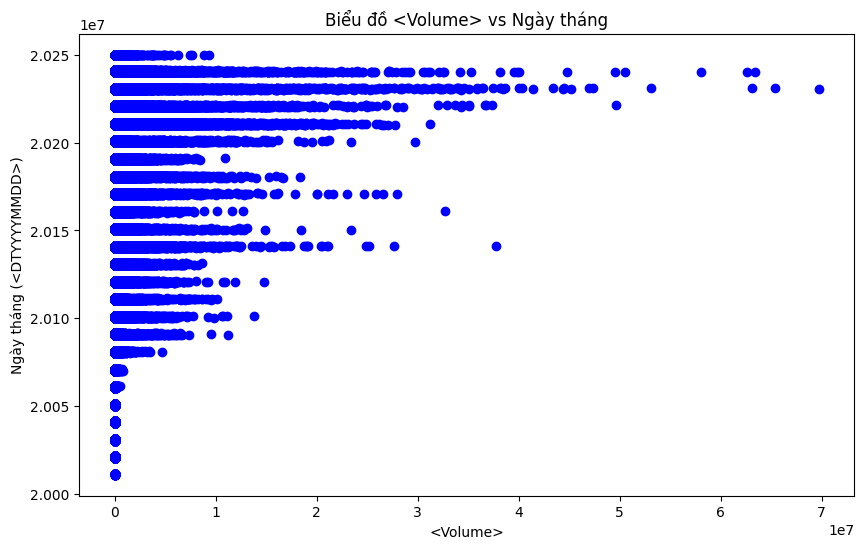

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('CafeF.HNX.Upto17.01.2025.csv')
print(df.head(10))
df_without_ticker = df.drop(columns=['<Ticker>'])
df_without_ticker.corr()

# Lọc các dòng có mã 'AAV'
df_fpt = df[df['<Ticker>'] == 'AAV']

# In kết quả ra màn hình
print(df_fpt)

# Vẽ biểu đồ với Volume ở trục x và <DTYYYYMMDD> ở trục y
plt.figure(figsize=(10, 6))  # Tùy chỉnh kích thước biểu đồ

plt.scatter(df['<Volume>'], df['<DTYYYYMMDD>'], color='blue', marker='o')  # Biểu đồ scatter
plt.title('Biểu đồ <Volume> vs Ngày tháng')  # Tiêu đề
plt.xlabel('<Volume>')  # Nhãn trục x
plt.ylabel('Ngày tháng (<DTYYYYMMDD>)')  # Nhãn trục y

# Hiển thị biểu đồ
plt.show()




C:\Users\84974\AppData\Local\Temp\ipykernel_10932\2313437090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aav.loc[:, 'Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')


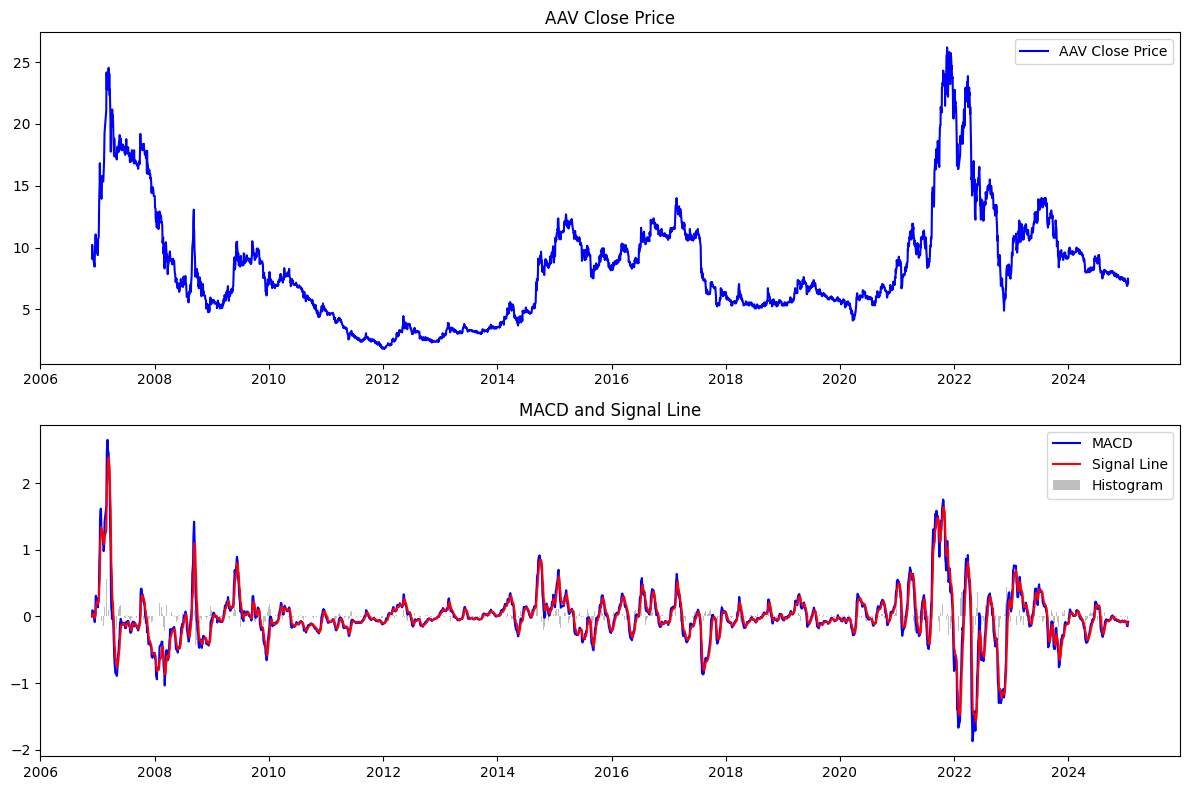

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
file_path = 'CafeF.HNX.Upto17.01.2025.csv'
data = pd.read_csv(file_path)

# Lọc dữ liệu của mã chứng khoán AAV
data_aav = data[data['<Ticker>'] == 'BCC']

# Đảm bảo cột DTYYYYMMDD được chuyển thành định dạng ngày tháng (nếu cần)
data_aav.loc[:, 'Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')

# Sắp xếp dữ liệu theo ngày
data_aav = data_aav.sort_values(by='Date')

# Tính EMA nhanh (12) và EMA chậm (26)
def calculate_ema(prices, period):
    return prices.ewm(span=period, adjust=False).mean()

data_aav['EMA12'] = calculate_ema(data_aav['<Close>'], 12)
data_aav['EMA26'] = calculate_ema(data_aav['<Close>'], 26)

# Tính MACD = EMA12 - EMA26
data_aav['MACD'] = data_aav['EMA12'] - data_aav['EMA26']

# Tính Signal Line (EMA của MACD với chu kỳ 9)
data_aav['Signal_Line'] = calculate_ema(data_aav['MACD'], 9)

# Tính Histogram (MACD - Signal Line)
data_aav['MACD_Histogram'] = data_aav['MACD'] - data_aav['Signal_Line']

# Vẽ biểu đồ MACD
plt.figure(figsize=(12, 8))

# Biểu đồ giá đóng cửa
plt.subplot(2, 1, 1)
plt.plot(data_aav['Date'], data_aav['<Close>'], label='AAV Close Price', color='blue')
plt.title('AAV Close Price')
plt.legend()

# Biểu đồ MACD và Signal Line
plt.subplot(2, 1, 2)
plt.plot(data_aav['Date'], data_aav['MACD'], label='MACD', color='blue')
plt.plot(data_aav['Date'], data_aav['Signal_Line'], label='Signal Line', color='red')
plt.bar(data_aav['Date'], data_aav['MACD_Histogram'], label='Histogram', color='gray', alpha=0.5)
plt.title('MACD and Signal Line')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\84974\AppData\Local\Temp\ipykernel_10932\743354786.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aav['Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')


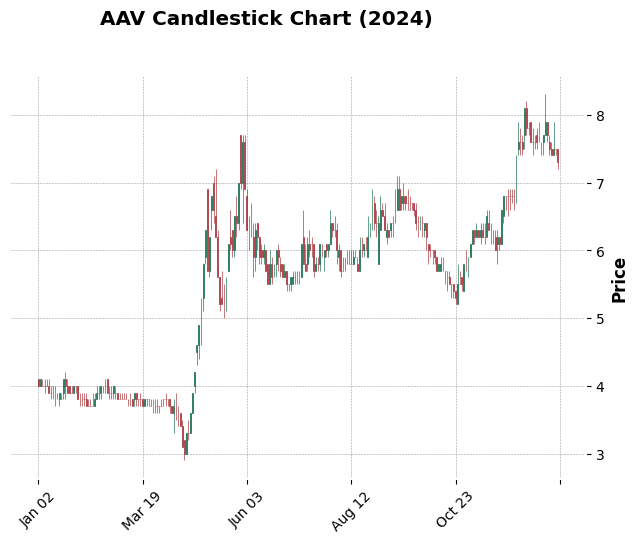

In [24]:
import pandas as pd
import mplfinance as mpf

# Đọc dữ liệu từ file CSV
file_path = 'CafeF.HNX.Upto17.01.2025.csv'
data = pd.read_csv(file_path)

# Lọc dữ liệu của mã chứng khoán AAV
data_aav = data[data['<Ticker>'] == 'AAV']

# Đảm bảo cột DTYYYYMMDD được chuyển thành định dạng ngày tháng (nếu cần)
data_aav['Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')

# Lọc dữ liệu cho năm 2024
data_aav_2024 = data_aav[data_aav['Date'].dt.year == 2024]

# Sắp xếp dữ liệu theo ngày
data_aav_2024 = data_aav_2024.sort_values(by='Date')

# Lấy các cột cần thiết để vẽ biểu đồ nến
data_aav_candlestick_2024 = data_aav_2024[['Date', '<Open>', '<High>', '<Low>', '<Close>']]

# Đổi tên cột cho dễ sử dụng
data_aav_candlestick_2024 = data_aav_candlestick_2024.rename(columns={'Date': 'Date', 
                                                                    '<Open>': 'Open', 
                                                                    '<High>': 'High', 
                                                                    '<Low>': 'Low', 
                                                                    '<Close>': 'Close'})

# Đặt cột 'Date' làm chỉ mục
data_aav_candlestick_2024.set_index('Date', inplace=True)

# Vẽ biểu đồ nến cho dữ liệu năm 2024
mpf.plot(data_aav_candlestick_2024, type='candle', style='charles', title='AAV Candlestick Chart (2024)', ylabel='Price')
